In [104]:
import sympy
from sympy.abc import x, y, z
from sympy import re, im, I
import numpy as np
import matplotlib.pyplot as plt


In [105]:
%%latex
\begin{equation*}
\psi = U (r - \frac{R^{2}}{r}) sin\theta
\end{equation*}
U - постоянная, а на границе цилиндра, 
R - радиус цилиндра


<IPython.core.display.Latex object>

In [106]:
def cylinder_stream_function(U=1, R=1):
    r = sympy.sqrt(x**2 + y**2)
    theta = sympy.atan2(y, x)
    return U * (r - R**2 / r) * sympy.sin(theta)

In [107]:
%%latex
\begin{equation*}
u = \frac{\partial \psi}{\partial y}   v =  − \frac{\partial \psi}{\partial x} 
\end{equation*}



<IPython.core.display.Latex object>

In [309]:
def velocity_field(psi):
    u = sympy.lambdify((x, y), sympy.diff(psi, y), 'numpy')
    v = sympy.lambdify((x, y), -sympy.diff(psi, x), 'numpy')
    return u, v

In [310]:
def plot_streamlines(ax, u, v, xlim=(-1, 1), ylim=(-1, 1), density=0.6):
    x0, x1 = xlim
    y0, y1 = ylim
    Y, X =  np.ogrid[y0:y1:100j, x0:x1:100j]
    ax.streamplot(X, Y, u(X, Y), v(X, Y), color='cornflowerblue', density=density)
    
def format_axes(ax):
    ax.set_aspect('equal')
    ax.figure.subplots_adjust(bottom=0, top=1, left=0, right=1)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

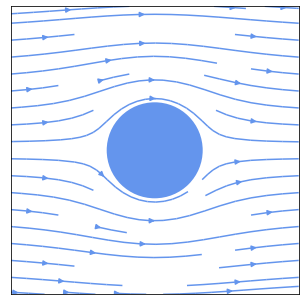

In [311]:
psi = cylinder_stream_function(U=1, R=1)
u, v = velocity_field(psi)

xlim = ylim = (-3, 3)
fig, ax = plt.subplots(figsize=(4, 4))
plot_streamlines(ax, u, v, xlim, ylim)

c = plt.Circle((0, 0), radius=1, facecolor='cornflowerblue')
ax.add_patch(c)

format_axes(ax)

In [312]:
"""Первая задача"""

'Первая задача'

In [313]:
%%latex

\begin{equation*}
\omega(z) = \sqrt{z^{2} + h^{2}}
\end{equation*}

<IPython.core.display.Latex object>

In [314]:
%%latex
\begin{equation*}
\psi = \frac{-2 h^{2}y}{4x^{2}+4y^{2}} + y 
\end{equation*}
h - высота стенки

<IPython.core.display.Latex object>

In [315]:
def obstacle_stream_function(h=1):
    return (-2 * h**2 * y) / (4 * x**2 + 4**y**2) + y

In [316]:
def draw_stream_obstacle(width, hieght, func, addfig=True, density=0.6):

    psi = func(h = hieght)
    u, v = velocity_field(psi)

    xlim = (-3, 3)
    ylim = (0, 3)
    fig, ax = plt.subplots(figsize=(4, 4))
    plot_streamlines(ax, u, v, xlim, ylim, density=density)
    if addfig:
        c = plt.Rectangle((-(width/2), -(hieght /2)), width=width, height=hieght , facecolor='cornflowerblue')
        ax.add_patch(c)

    format_axes(ax)

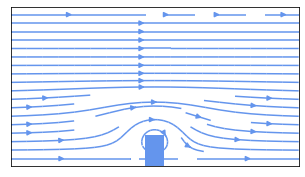

In [317]:
draw_stream_obstacle(0.4, 1, obstacle_stream_function, density=0.6)

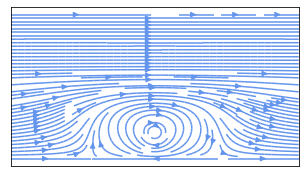

In [318]:
draw_stream_obstacle(0.4, 2, obstacle_stream_function, addfig=False ,density=1.4)

In [319]:
%%latex

\begin{equation*}
\omega(z) = z + \frac{h^{2}}{2(z - a)}
\end{equation*}

<IPython.core.display.Latex object>

In [320]:
%%latex


\begin{equation*}

\psi = \frac{-2 h^{2}y}{4(- a + x)^{2}+4y^{2}} + y 
\end{equation*}
h - высота стенки

<IPython.core.display.Latex object>

In [321]:
def obstacle_stream_function_elapsed(h=1, a = 1):
    return (-2 * h**2 * y) / (4 *(-a + x)**2 + 4**y**2) + y

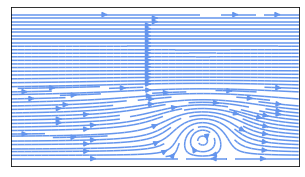

In [322]:
draw_stream_obstacle(0.4, 1, obstacle_stream_function_elapsed, addfig=False ,density=1.4)

In [323]:
im(H/pi * sympy.log(sympy.exp(pi * (x + I*y) / H) + sympy.exp(pi * a / H)))

2*arg(exp(pi*x/2)*exp(I*pi*y/2) + 1)/pi

In [324]:
def get_to(h=1):
    return 2 * sympy.arg(sympy.exp(sympy.pi * x / 2)*sympy.exp(sympy.pi * y * I / 2) +1 ) / sympy.pi

In [325]:
def ne_(h=1):
    return sympy.lambdify((x, y), get_to(h=h))

NameError: name 'Derivative' is not defined

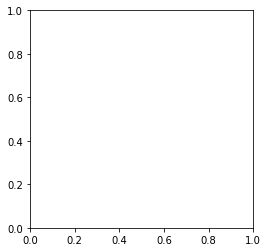

In [326]:
draw_stream_obstacle(0.4, 1, get_to, addfig=False ,density=1.4)

In [304]:
get_to()

2*arg(exp(pi*x/2)*exp(I*pi*y/2) + 1)/pi